# Lecture 08 Review of Histograms

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

In [2]:
top_movies = Table.read_table('data/top_movies_2017.csv')

In [4]:
this_year = 2024
ages = this_year - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,85
Star Wars,Fox,460998007,1583483200,1977,47
The Sound of Music,Fox,158671368,1266072700,1965,59
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,42
Titanic,Paramount,658672302,1204368000,1997,27
The Ten Commandments,Paramount,65500000,1164590000,1956,68
Jaws,Universal,260000000,1138620700,1975,49
Doctor Zhivago,MGM,111721910,1103564200,1965,59
The Exorcist,Warner Brothers,232906145,983226600,1973,51
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,87


# Grouping by categorical variable
We can group our movies by the *categorical* variable 'Studio', to find out how many movies were produced by each studio, using the `group()` function.

In [5]:
studios = top_movies.group('Studio')
studios

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


we can then go ahead and plot those in a bar plot. Remember. The First parameter is the variable to use on x-axis, second parameter is the variable to use on the y-axis. Check the [`bar()` documentation](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.barh.html#datascience.tables.Table.bar)

/home/jovyan/.local/lib/python3.11/site-packages/datascience/tables.py:3647: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(tick_labels, stretch='ultra-condensed')


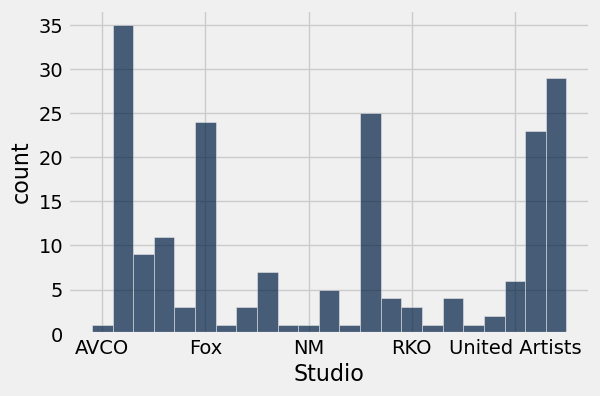

In [6]:
studios.bar(column_for_categories = 'Studio', select = 'count')

Let's make it better
- Sort the bars in decreasing order
- Only show the 10 largest studios
- Turn it around by 90 degrees
- make the code readable

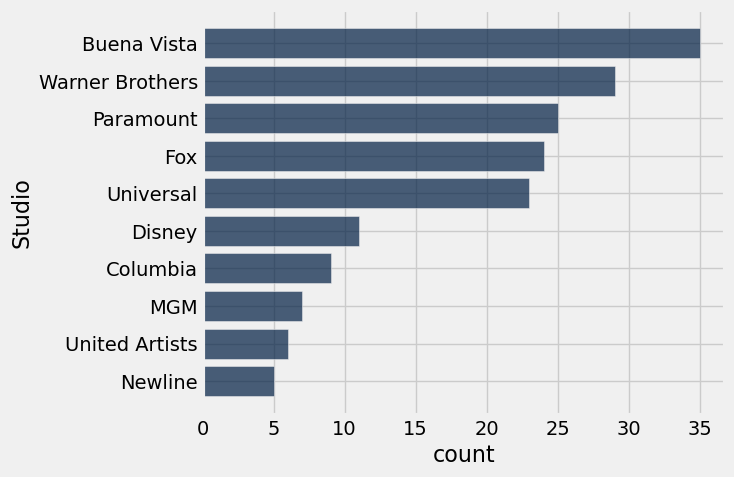

In [7]:
(top_movies
 .group('Studio')
 .sort('count', descending = True)
 .take(np.arange(0,10)) # take first 10 rows --> top 10 studios
 .barh('Studio', 'count')
)

# Grouping by numerical variable
We want to find out something about the age distribition of movies. I.e. seeing how many movies were produced in different age brackets.

Let's group movies by the years using the `group()` function

In [8]:
this_year = 2024
ages = this_year - top_movies.column('Year') # extracting Year column as an array, so that I can subtract each value from 2024
# to find ages!
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,85
Star Wars,Fox,460998007,1583483200,1977,47
The Sound of Music,Fox,158671368,1266072700,1965,59
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,42
Titanic,Paramount,658672302,1204368000,1997,27
The Ten Commandments,Paramount,65500000,1164590000,1956,68
Jaws,Universal,260000000,1138620700,1975,49
Doctor Zhivago,MGM,111721910,1103564200,1965,59
The Exorcist,Warner Brothers,232906145,983226600,1973,51
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,87


In [12]:
age_groups = top_movies.group('Age').sort('count', descending = True)
age_groups

Age,count
8,9
9,6
20,6
22,6
15,5
17,5
21,5
23,5
11,4
25,4


/home/jovyan/.local/lib/python3.11/site-packages/datascience/tables.py:3647: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(tick_labels, stretch='ultra-condensed')


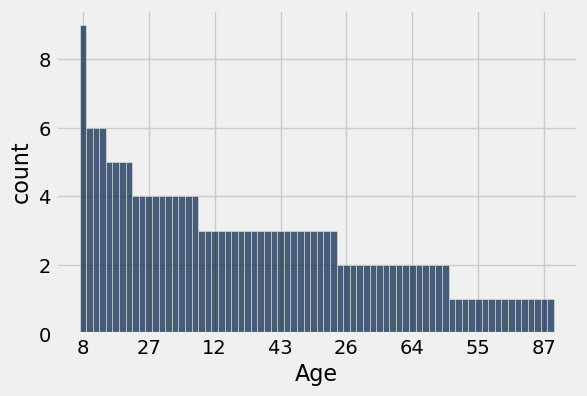

In [13]:
age_groups.bar('Age','count')

# Binning
This was a bit boring. We'd much rather create some groups (bins) in which we aggregate a ranges of ages.
I.e. count all moves that are 0-10 years old, all movies that are 10-20 years old etc.

In [17]:
Table.bar?

Signature:
Table.bar(
    self,
    column_for_categories=None,
    select=None,
    overlay=True,
    width=None,
    height=None,
    **vargs,
)
Docstring:
Plot bar charts for the table.

Each plot is labeled using the values in `column_for_categories` and
one plot is produced for every other column (or for the columns
designated by `select`).

Every selected column except `column_for_categories` must be numerical.

Args:
    column_for_categories (str): A column containing x-axis categories

Kwargs:
    overlay (bool): create a chart with one color per data column;
        if False, each will be displayed separately.

    vargs: Additional arguments that get passed into `plt.bar`.
        See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar
        for additional arguments that can be passed into vargs.
File:      ~/.local/lib/python3.11/site-packages/datascience/tables.py
Type:      function

In [18]:
Table.barh?

Signature:
Table.barh(
    self,
    column_for_categories=None,
    select=None,
    overlay=True,
    width=None,
    **vargs,
)
Docstring:
Plot horizontal bar charts for the table. Redirects to ``Table#ibarh`` if interactive plots
are enabled with ``Table#interactive_plots``

Args:
    ``column_for_categories`` (``str``): A column containing y-axis categories
        used to create buckets for bar chart.

Kwargs:
    overlay (bool): create a chart with one color per data column;
        if False, each will be displayed separately.
    show (bool): whether to show the figure if using interactive plots; if false, the 
        figure is returned instead
    vargs: Additional arguments that get passed into `plt.barh`.
        See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh
        for additional arguments that can be passed into vargs.

Raises:
    ValueError -- Every selected except column for ``column_for_categories``
        must be numerical.

Returns:
    Horiz

In [15]:
min(age_groups.column('Age')), max(age_groups.column('Age'))

(7, 103)

In [23]:
my_bins = np.arange(0, 120, 10) # (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110)
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data.show()

bin,Age count
0,18
10,32
20,41
30,27
40,26
50,23
60,16
70,10
80,6
90,0


Now make bar plot

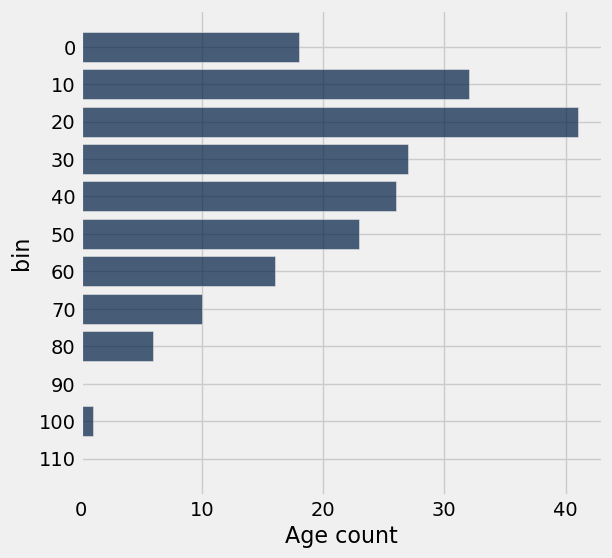

In [24]:
binned_data.barh('bin', 'Age count')

# Making a histogram
We are not fully satisfied. 
- The movies in the first bar are not e.g. 0 years old. They are between 0 and 10.
- Even worse: What happens if our bins are not uniform ... we loose our perspective on the x-axis

/home/jovyan/.local/lib/python3.11/site-packages/datascience/tables.py:3647: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(tick_labels, stretch='ultra-condensed')


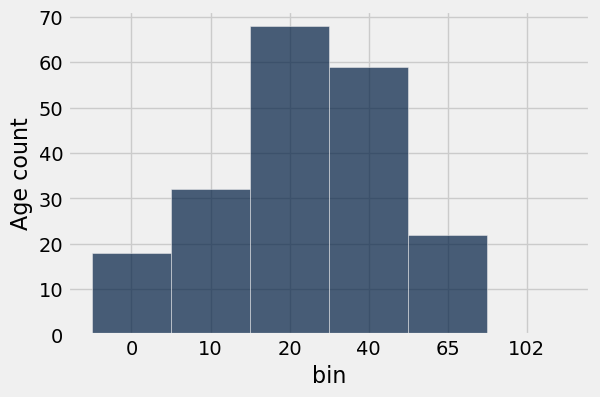

In [25]:
my_bins = make_array(0, 10, 20, 40, 65, 102)
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data.bar('bin', 'Age count')

We can fix this by using the [`hist()` function](http://www.data8.org/datascience/_autosummary/datascience.tables.Table.hist.html#datascience.tables.Table.hist)

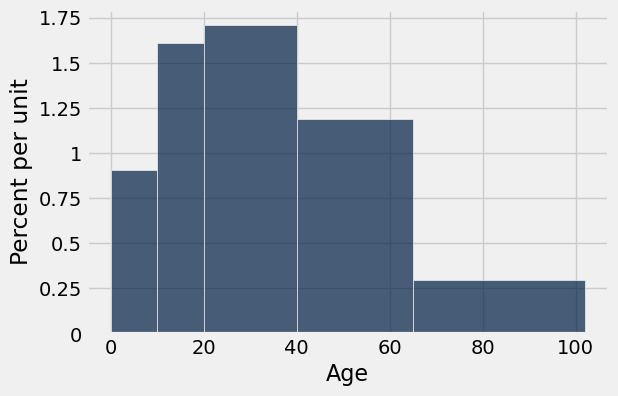

In [26]:
top_movies.hist('Age', bins = my_bins)

## What does the "percent per unit" mean?

Let's inspect our binned data

In [28]:
sum(binned_data.column('Age count'))

199

In [31]:
binned_data
18 / 199 * 100

9.045226130653267

Add a column containing the percentage of data in each bin. Hint: use `sum()` function.

In [30]:
# take bin [0-10) years old, there are 18 movies in there
# 18 / 199 * 100
share = binned_data.column('Age count') / sum(binned_data.column('Age count')) * 100
binned_data = binned_data.with_column('Percent', share)
binned_data

bin,Age count,Percent
0,18,9.04523
10,32,16.0804
20,68,34.1709
40,59,29.6482
65,22,11.0553
102,0,0


## Bin width
now we calculate the bin width. I.e. how many years each bin spans. We use the `np.diff()` function

In [33]:
np.diff(make_array(1,2,3,4))

array([1, 1, 1])

In [34]:
np.diff(make_array(1,10,5,15))

array([ 9, -5, 10])

In [36]:
bin_width = np.diff(binned_data.column('bin'))
bin_width

array([10, 10, 20, 25, 37])

we want to add a new column to the table. However, the `bin_width` is one element shorter than the table.
We therefore shorten the table by one

In [38]:
binned_data_ = binned_data.take(np.arange(binned_data.num_rows - 1)) 
binned_data_ = binned_data_.with_column('Width', bin_width)
binned_data_

bin,Age count,Percent,Width
0,18,9.04523,10
10,32,16.0804,10
20,68,34.1709,20
40,59,29.6482,25
65,22,11.0553,37


Now we can calculate the percent per unit

In [39]:
percent_per_unit = binned_data_.column('Percent') / binned_data_.column('Width')
percent_per_unit

array([ 0.90452261,  1.6080402 ,  1.70854271,  1.18592965,  0.29879125])

In [40]:
binned_data_.with_column('percent per unit', percent_per_unit)

bin,Age count,Percent,Width,percent per unit
0,18,9.04523,10,0.904523
10,32,16.0804,10,1.60804
20,68,34.1709,20,1.70854
40,59,29.6482,25,1.18593
65,22,11.0553,37,0.298791


In [ ]:
top_movies.hist('Age', bins = my_bins, unit='Year')

# Discussion question
https://ipm.ucanr.edu/calludt.cgi/WXSTATIONDATA?STN=STBARBRA.C

- University of California Statewide Integrated Pest Management Program
- How to Manage Pests: California Weather Data
- Retrieve data in comma delimited data file format
 
Weather database request:  
 
Time Period: January 1, 1951 to January 1, 2023, retrieved on May 2, 2023"
 (10958 days)

|Variable  | Description                  |Units                         |
|:--    | :--| :-- |
|   1      | Database name                |                              |
|   2      | Date: year,month,day         |yyyymmdd"                     |
|   3      | Observation time             |hhmm                          |
|   4      | Precipitation, amount        |Millimeters"                  |
|   5      | Precipitation, type          |(coded)"                      |
|   6      | Air temperature, maximum     |Celsius"                      |
|   7      | Air temperature, minimum     |Celsius"                      |
|   8      | Air temperature, observed    |Celsius"                      |
|   9      | Weather conditions           |(coded)"                      |
|  10      | Wind, direction              |N,NE,E,SE,S,SW,W,NW, 0=calm"  |
|  11      | Wind, speed                  |Meters per second"            |
|  12      | Bulb temperature, wet        |Celsius"                      |
|  13      | Bulb temperature, dry        |Celsius"                      |
|  14      | Soil temperature, maximum    |Celsius"                      |
|  15      | Soil temperature, minimum    |Celsius"                      |
|  16      | Pan evaporation              |Millimeters"                  |
|  17      | Solar radiation              |Watts per sq. meters"         |
|  18      | Reference evapotranspiration |Millimeters"                  |
|  19      | Relative humidity, minimum   |Percent"                      |
|  20      | Relative humidity, maximum   |Percent                       |



Weather Type
Weather type contains information about the weather at the observation time. Also, if a significant weather event occurs during a day, hail or a tornado for instance, the occurrence may be noted in this field.

|Code  | Meaning    |
| :--   | :--|
|C	|Clear	                                   |
|R	|Rain                                      |
|PC	|Partly cloudy	                           |
|R+	|Heavy rain                                |
|CY	|Cloudy	                                   |
|W	|Rain showers                              |
|HZ	|Haze or smoke	                           |
|W+	|Heavy showers                             |
|DS	|Dust storm	                               |
|S	|Snow                                      |
|F	|Fog	                                   |
|S+	|Heavy snow                                |
|F+	|Heavy fog	                               |
|BS	|Blowing snow                              |
|DZ	|Drizzle	                               |
|IP	|Sleet                                     |
|TH	|Thunderstorm	                           |
|HL	|Hail                                      |
|TO	|Tornado	                               |
|SR	|Snow and rain mixed                       |
|T	|Thunder, no rain	                       |
|HW	|High winds                                |
|L	|Lightning, no thunder	DW	Dew present    |

In [ ]:
weather = Table.read_table('data/sb_weather2.csv')
weather

In [ ]:
(weather
    .group('Wx')
    .barh('Wx', 'count')
)

In [ ]:
weather.hist('Air max')

In [ ]:
weather.scatter('Air max', 'min')

# Convert to °F
$F = (C × 9/5) + 32$
